In [20]:
!pip install tf-keras-vis

In [23]:
!pip install tf-keras-vis
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16 as Model

Загрузим 5 изображений и отобразим их.

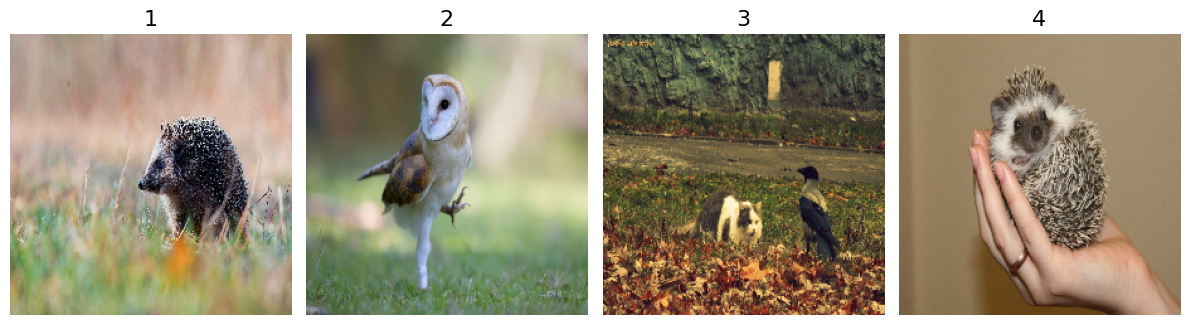

In [29]:
# Загружаем предобученную модель с весами ImageNet и включаем верхний слой (классификация)
model = Model(weights='imagenet', include_top=True)

# Список заголовков для изображений
imgTitleList = ['1', '2', '3', '4']

# Список путей к изображениям
imgPathList = ['/content/1.jpg', '/content/2.png', '/content/3.jpg', '/content/5.jpg']

# Загружаем изображения, изменяем их размер до 224x224 пикселей и преобразуем в массив NumPy
imgArr = np.asarray([np.array(load_img(imgPath, target_size=(224, 224))) for imgPath in imgPathList])

# Предобрабатываем изображения для подачи в модель (нормализация и изменение формата)
X = preprocess_input(imgArr)

# Создаем фигуру и оси для отображения изображений (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждого изображения
    ax[i].imshow(imgArr[i])  # Отображаем изображение на соответствующей оси
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с изображениями
plt.show()

ReplaceToLinear

In [30]:
# Создаем экземпляр класса ReplaceToLinear
replace2linear = ReplaceToLinear()

# Определяем функцию модификации модели
def model_modifier_function(cloned_model):
    # Меняем активацию последнего слоя модели на линейную
    cloned_model.layers[-1].activation = tf.keras.activations.linear

# Создаем объект CategoricalScore с заданными индексами классов
score = CategoricalScore([41, 42, 62, 63])

# Определяем функцию для получения оценок по выходным данным модели
def score_function(output):
    # Возвращаем значения выходного слоя для указанных индексов классов
    return (output[0][41], output[1][42], output[2][62], output[3][63])

Отобразим карты значимости

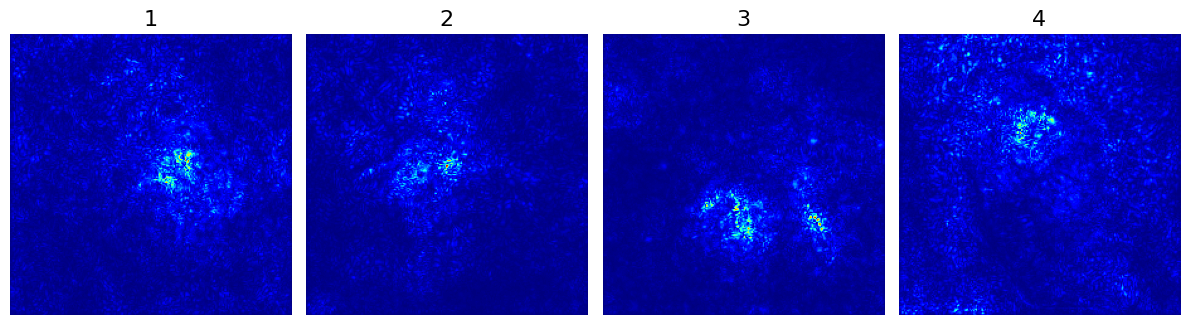

In [31]:
# Создаем объект Saliency для вычисления карты значимости
saliency = Saliency(model, model_modifier=replace2linear, clone=True)

# Вычисляем карты значимости для заданных входных данных X с использованием заданного объекта score
mapList = saliency(score, X)

# Создаем фигуру и оси для отображения карт значимости (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждой карты значимости
    ax[i].imshow(mapList[i], cmap='jet')  # Отображаем карту значимости с использованием цветовой карты 'jet'
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с картами значимости
plt.show()

SmoothGrad

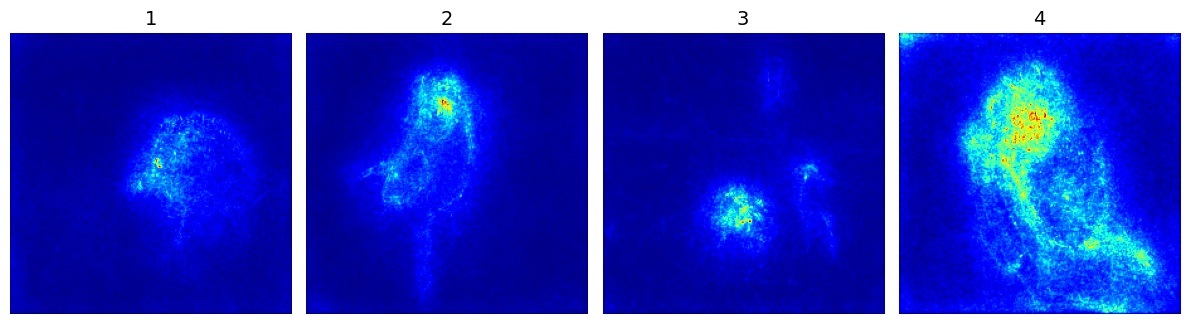

In [32]:
# Вычисляем карты значимости с использованием метода saliency, добавляя параметры для сглаживания
mapList = saliency(score, X, smooth_samples=20, smooth_noise=0.20)

# Создаем фигуру и оси для отображения карт значимости (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=14)  # Устанавливаем заголовок для каждой карты значимости
    ax[i].imshow(mapList[i], cmap='jet')  # Отображаем карту значимости с использованием цветовой карты 'jet'
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с картами значимости
plt.show()

GrandCAM

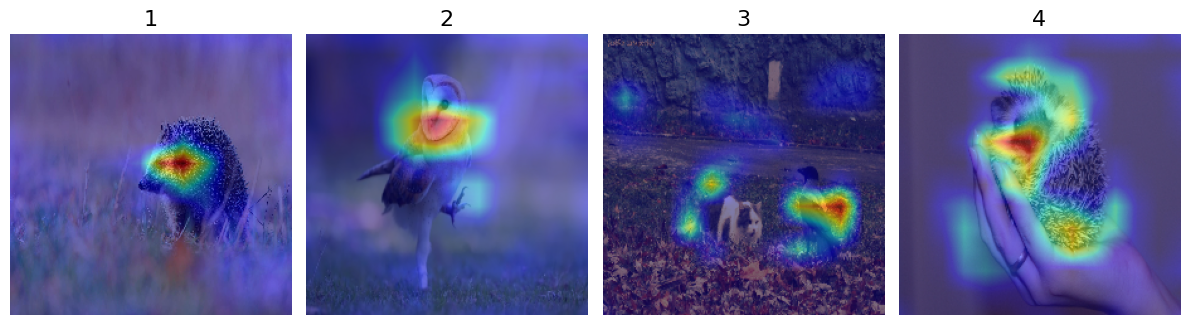

In [33]:
# Создаем объект Gradcam для вычисления карт Grad-CAM
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)

# Вычисляем карты Grad-CAM для заданных входных данных X, указывая предпоследний слой
mapList = gradcam(score, X, penultimate_layer=-1)

# Создаем фигуру и оси для отображения изображений с картами Grad-CAM (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    # Преобразуем карту значимости в формат изображения (целочисленный) с использованием цветовой карты 'jet'
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)  # Применяем цветовую карту и масштабируем значения

    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждой карты Grad-CAM
    ax[i].imshow(imgArr[i])  # Отображаем оригинальное изображение
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)  # Накладываем тепловую карту на изображение с прозрачностью 0.5
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с изображениями и картами Grad-CAM
plt.show()

GrandCAM++

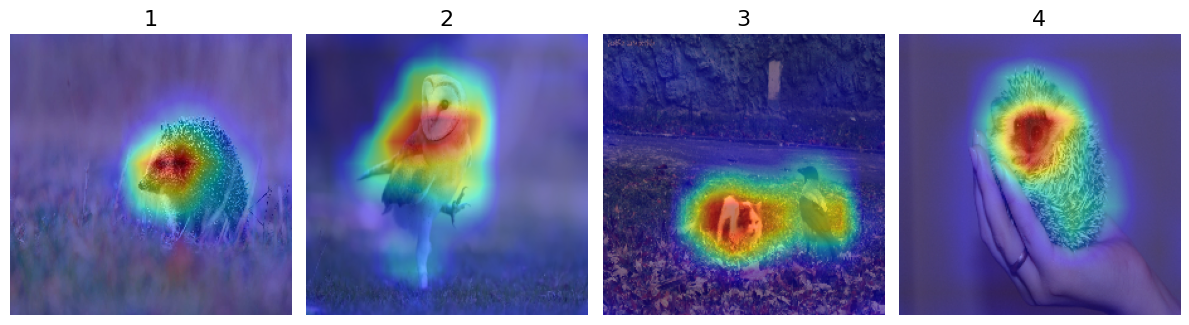

In [34]:
# Создаем объект GradcamPlusPlus для вычисления карт Grad-CAM++
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)

# Вычисляем карты Grad-CAM++ для заданных входных данных X, указывая предпоследний слой
mapList = gradcam(score, X, penultimate_layer=-1)

# Создаем фигуру и оси для отображения изображений с картами Grad-CAM++ (1 строка, 4 колонки)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по заголовкам изображений и индексам
for i, title in enumerate(imgTitleList):
    # Преобразуем карту значимости в формат изображения (целочисленный) с использованием цветовой карты 'jet'
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)  # Применяем цветовую карту и масштабируем значения

    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждой карты Grad-CAM++
    ax[i].imshow(imgArr[i])  # Отображаем оригинальное изображение
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)  # Накладываем тепловую карту на изображение с прозрачностью 0.5
    ax[i].axis('off')  # Отключаем отображение осей (графиков) для более чистого вида

# Настраиваем компоновку графиков
plt.tight_layout()

# Показываем финальный график с изображениями и картами Grad-CAM++
plt.show()

GrandCAM++ прекрасен для определения спорных фотографий,особенно видим это на примере 3 ,
На остальных примерах связаных с GrandCAM++ можем указать что он прекрасно находит лицо
SmoothGrad тоже посильнее попытался найти "пиксели", почти выдаёт правильный контур фотографий